In [16]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv("./train_origin.csv")
test = pd.read_csv("./test_origin.csv")
train_id = train["train_id"]
target = train["dbh"]
train = train.drop(["dbh"],axis=1)
test_id = test["test_id"]
print(train.describe())

         train_id       max_h       min_h      mean_h        sd_h  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   31.256400   13.551000   25.116951    4.080438   
std     29.011492    6.669115    7.094876    6.062526    1.764470   
min      1.000000   21.010000    5.100000   14.525690    0.520348   
25%     25.750000   25.505000    8.372500   20.403993    2.917439   
50%     50.500000   30.705000   11.980000   23.497401    3.866057   
75%     75.250000   35.872500   16.355000   29.329508    5.200860   
max    100.000000   47.230000   38.259998   40.867333    9.411008   

              sum_h  crown_area  crown_perim  
count    100.000000   100.00000   100.000000  
mean    3434.404894    22.13120    25.992000  
std     2177.420502    12.88846     9.234451  
min      243.139998     2.08000     1.600000  
25%     1873.557498    12.28000    20.800000  
50%     3170.640000    20.16000    26.400000  
75%     4608.217491    29.48000    32.800000  
ma

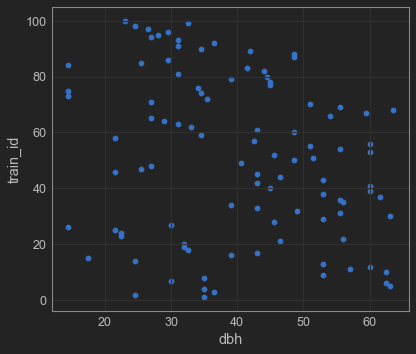

In [29]:
import matplotlib.pyplot as plt
x = target
y = train_id
plt.scatter(x,y)
plt.xlabel("dbh")
plt.ylabel("train_id")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

kf = KFold(n_splits=100,random_state=0)
pred = []

for X_index, Y_index in kf.split(train):
    X_train, X_valid = train.loc[X_index], target.loc[X_index]
    Y_train, Y_valid = train.loc[Y_index], target.loc[Y_index]
    regr = LinearRegression(normalize=False)
    regr.fit(X_train,X_valid)
    predict = regr.predict(Y_train)
    pred.append(np.sqrt(mean_squared_error(predict,Y_valid)))
    
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
print("RMSE: ", mean(pred))
predict = regr.predict(test)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Intercept: 40.95064828805995
Coefficients:  [-0.13741631  1.21372509 -0.35857906 -0.5453166  -3.05848501 -0.00349648
  0.60368432 -0.07301978]
RMSE:  11.770906189144693


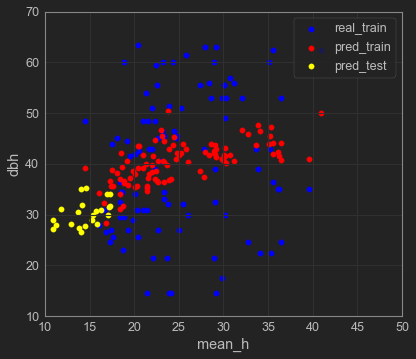

In [24]:
plt.scatter(train["mean_h"],target,color="blue",label="real_train")
plt.scatter(train["mean_h"],regr.predict(train),color="red",label="pred_train")
plt.scatter(test["mean_h"],regr.predict(test),color="yellow",label="pred_test")
plt.ylabel("dbh")
plt.xlabel("mean_h")
plt.xlim(10,50)
plt.ylim(10,70)
plt.legend(loc="upper right")
plt.show()

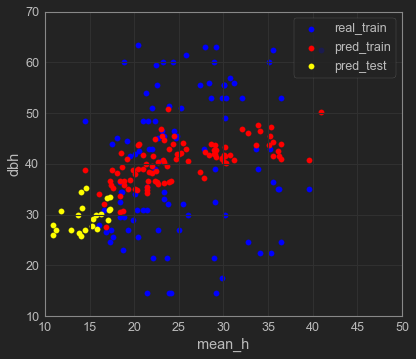

In [27]:
regr = LinearRegression(normalize=False)
regr.fit(train,target)
predict = regr.predict(test)
plt.scatter(train["mean_h"],target,color="blue",label="real_train")
plt.scatter(train["mean_h"],regr.predict(train),color="red",label="pred_train")
plt.scatter(test["mean_h"],regr.predict(test),color="yellow",label="pred_test")
plt.ylabel("dbh")
plt.xlabel("mean_h")
plt.xlim(10,50)
plt.ylim(10,70)
plt.legend(loc="upper right")
plt.show()

In [28]:
pred = pd.DataFrame()
pred["Id"] = test["test_id"]
pred["dbh"] = predict.round(2)
pred.to_csv("DBH_SGDR5.csv", index=False)